# Gridded Data Analysis Practice

### Summary
In this worksheet we are going to walk through performing scientific analysis with real gridded data using $NO_2$ data from the Ozone Monitoring Instrument (OMI)! We will make a map of global $NO_2$, compare $NO_2$ in two different US cities, and finally compute the distribution of average $NO_2$ across latitudes.

## Part A - Download and inspect data

The first step in this analysis will be to download and inspect the dataset. Use search.earthdata.gov to locate this OMI dataset. Put "OMI_MINDS_NO2d" into the search bar. This is called the **short name** of the dataset. The short name is a unique dataset identifier that can be used to locate a particular NASA dataset. They can be viewed on the _Collection Details_ page.

After downloading, the remaining steps in this section will allow us to get a first look at our data and get a starting sense of how the data is setup.

**Question 1**

Download the **granule**, or file, from May 30th 2024 and upload it into Cryocloud.

**Question 2**

Open this file using xarray

In [78]:
import xarray as xr

In [79]:
# May 30th 2024
ds_may_30 = xr.open_dataset('OMI-Aura_L3-OMI_MINDS_NO2d_2024m0530_v01-01-2024m0618t213126.nc')

**Question 3**

- What type of data structure was returned when you opened the file?
- Find the variable called "ColumnAmountNO2". How many dimensions does this data variable have? What are those dimensions?

In [80]:
ds_may_30

<xarray.Dataset> Size: 17MB
Dimensions:                           (Latitude: 720, Longitude: 1440, Time: 1,
                                       BoundsIndex: 2)
Coordinates:
  * Latitude                          (Latitude) float32 3kB -89.88 ... 89.88
  * Longitude                         (Longitude) float32 6kB -179.9 ... 179.9
  * Time                              (Time) datetime64[ns] 8B 2024-05-30T12:...
  * BoundsIndex                       (BoundsIndex) int32 8B 1 2
Data variables:
    LatitudeBounds                    (Latitude, BoundsIndex) float32 6kB ...
    LongitudeBounds                   (Longitude, BoundsIndex) float32 12kB ...
    TimeBounds                        (Time, BoundsIndex) datetime64[ns] 16B ...
    crs                               int32 4B ...
    ColumnAmountNO2                   (Time, Latitude, Longitude) float32 4MB ...
    ColumnAmountNO2CloudScreened      (Time, Latitude, Longitude) float32 4MB ...
    ColumnAmountNO2TropCloudScreened  (Time, Latitude, Longitude) float32 4MB ...
    Weight                            (Time, Latitude, Longitude) float32 4MB ...
Attributes: (12/50)
    AuthorAffiliation:              NASA/GSFC
    AuthorName:                     L. Lamsal, N. Krotkov, S. Marchenko, et al.
    comment:                        This release of the OMI_MINDS_NO2d produc...
    Conventions:                    CF-1.8
    DataSetQuality:                 Validation of the OMI NO2 retrievals with...
    DayNightFlag:                   Day
    ...                             ...
    VersionID:                      1.1
    WesternmostLongitude:           -180.0
    history:                        2024-06-18 21:31:26: original file create...
    GranuleID:                      OMI-Aura_L3-OMI_MINDS_NO2d_2024m0530_v01-...
    LocalGranuleID:                 OMI-Aura_L3-OMI_MINDS_NO2d_2024m0530_v01-...
    ProductionDateTime:             2024-06-18T21:31:26.0Z

In [81]:
# ColumnAmountNO2 has three dimensions - Time, Latitude, and Longitude

**Question 4**

Make a plot of this data showing a map of ColumnAmountNO2 values.

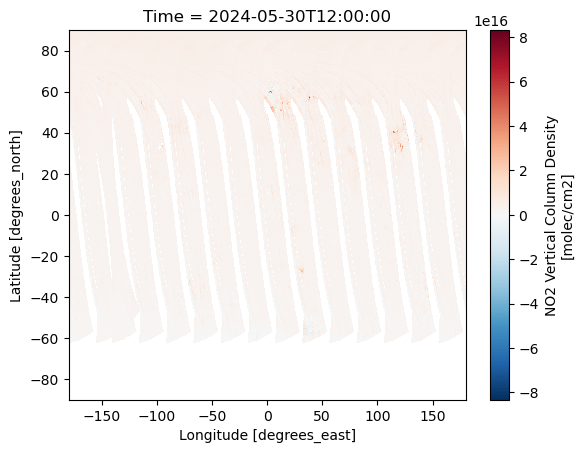

In [82]:
ds_may_30.ColumnAmountNO2.plot()

**Question 5**

In the previous plot we see there are a few high values but the rest of the plot looks mostly blank. This is often because there are a few areas with values much much higher than all the rest of the extent. One way to fix this is to use a log scale colorbar, but this requires a bit of effort. A fast temporary fix for this early stage of data exploration is to change the maximum value of the colorbar so that all data values above a certain number display with a redder color.

To do this, add an additional argument `vmax` to your `.plot()` method and set `vmax` equal to 1.5e16.

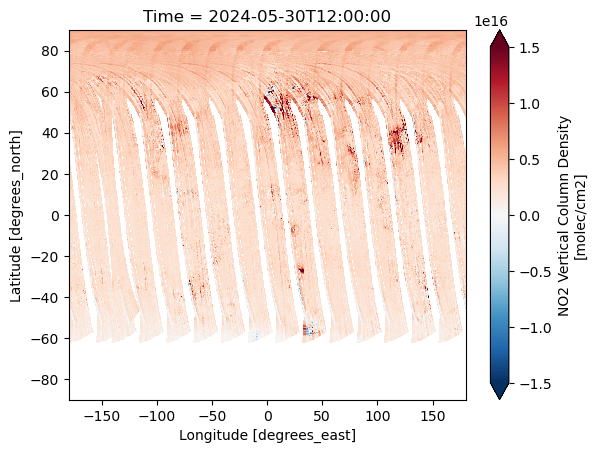

In [83]:
ds_may_30.ColumnAmountNO2.plot(vmax=1.5e16)

**Question 6**

Using either the map above or by exploring the datastructure, find out:
- What is the geographic extent of this data? (Does it cover just the US? Just one hemisphere? The whole world? etc.)
- Are there nodata values in this data?

In [84]:
# This data file has values for the whole earth, from -89.88 to 89.88 latitude and  -179.9 to  179.9 longitude
# Yes, there are nodata values. All data below 60 South is nodata, as well as the spaces between satellite tracks

In [85]:
print('Latitude bounds: ', ds_may_30.Latitude.max().values, ds_may_30.Latitude.min().values)
print('Longitude bounds: ', ds_may_30.Longitude.max().values, ds_may_30.Longitude.min().values)

Latitude bounds:  89.875 -89.875
Longitude bounds:  179.875 -179.875


:::{note} Milestone
Congrats! You've completed the first part of this exercise - downloading, opening, and exploring a real netcdf file!

![celebrate](https://www.icegif.com/wp-content/uploads/celebration-icegif-18.gif)
:::

### Part A Challenge Questions

_If you sped through the first 6 questions feel free to work on these questions. They aren't necessary for the next section, however, so feel free skip them and move to part B._


**Challenge Question Part A No. 1**

Notice on the map's colorbar that the data values go up to $8x10^{16}$. That's a pretty big number. Does $8x10^{16}$ exceed the reasonable limit for this data product? What are the units for this number?

In [86]:
ds_may_30.ColumnAmountNO2.attrs['valid_max']

1e+18

In [87]:
ds_may_30.ColumnAmountNO2.attrs['units']

'molec/cm2'

In [88]:
# Looking at the attributes for ColumnAmountNO2 we see that there is a valid max of 1e+18, which is above 8e16.
# The data values plotted are valid

:::{hint} Hint
:class: dropdown

Explore the metadata stored in the attributes of the ColumnAmountNO2 variable.
:::

**Challenge Question Part A No. 2**

There are a number of variables in this data product that we won't be using in this analysis and these are the variables with Bounds in the name. These Bounds variables specify the latitude, longitude, and time limits of the pixels, as opposed to the regular Latitude Longitude and Time variables which show the value for the middle of the pixel. (To see this more clearly compare `ds_may_30.LatitudeBounds[0].values` with `ds_may_30.Latitude[0].values`)

Remove the following variables from the dataset: `LatitudeBounds`, `LongitudeBounds`, `TimeBounds`, `crs`, `BoundsIndex`. Re-assign the variable (either to the same name or a new name) so that these variables aren't present in your data for the rest of this worksheet.

In [89]:
ds_may_30 = ds_may_30.drop_vars(['LatitudeBounds', 'LongitudeBounds', 'TimeBounds', 'crs', 'Weight', 'BoundsIndex'])

:::{hint}
:class: dropdown

Check out the [`xarray.Dataset.drop_vars()` method](https://docs.xarray.dev/en/stable/generated/xarray.Dataset.drop_vars.html). Don't forget that there are a few examples on the documentation page!
:::

## Part B - Data Analysis

In this next section we are going to dig in a bit more to our dataset and start asking some preliminary science questions.

**Question 7**

Since we won't be using any of the variables other than `ColumnAverageNO2` for the rest of the notebook, create a new Python variable that has just that `ColumnAverageNO2` data variable in it.

In [90]:
da_may_30 = ds_may_30.ColumnAmountNO2

**Question 8**

You'll notice looking at the colorbar of your previous plots that there are a few $NO_2$ concentrations that display a negative number. We don't _really_ get negative species concentrations; the negative number is likely an artifact of the satellite algorithm. 

To deal with this, mask out all the negative values in the dataset. (If you were really using this dataset for your analysis you'd also want to do some reading to learn more about what the negative values mean)

Plot your data again after masking (use the name `vmax` value as above).

In [91]:
# Option 1 - Using xr.where()
import numpy as np


da_may_30 = xr.where(da_may_30 > 0, da_may_30, np.nan)

In [92]:
# Option 2 -- Using DataArray.where()
da_may_30 = da_may_30.where(da_may_30>=0)

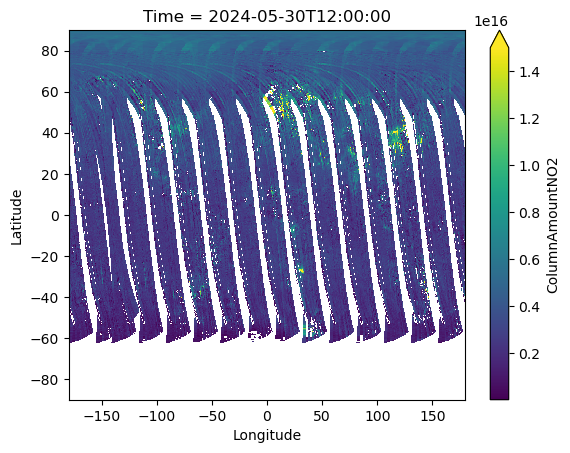

In [93]:
# Plotting
da_may_30.plot(vmax=1.5e16)

<!-- :::{note} Hint
:class: dropdown

TODO

::: -->

:::{hint}
:class: dropdown

When we **mask** a dataset we are changing numbers of a certain value (ex. -999 or anything less than 0) to a new number (here NaN). In other words, we want all pixels _where_ the value is less than 0 to become `np.nan`, and we want all other values to stay the same.

:::

**Question 8**

Create a plot of just the United States NO2 data

_This plot is a little sad with the nodata streaks in it. To make a nicer plot, checkout the Part B challenge questions. In these steps you will download two more images and average them together to get a much more consistent map_

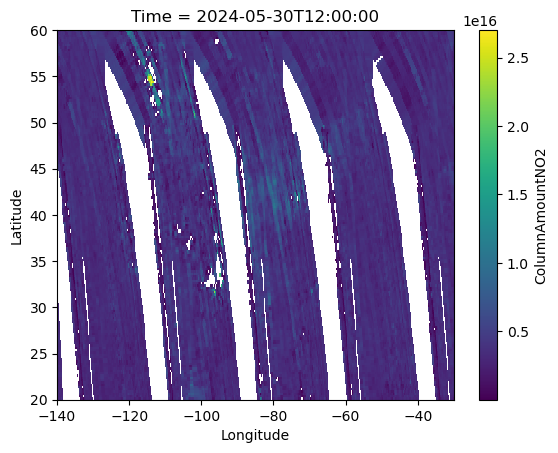

In [94]:
da_may_30.sel(Latitude=slice(20, 60), Longitude=slice(-140, -30)).plot()

:::{hint}
:class: dropdown

The two steps to doing this are: 1) Subset your data to just the US and 2) Plot the dataarray

If you're not sure the latitude and longitude bounds of the US you can pull up Google maps, zoom out, and click on the map to view the latitude and longitude values of the point you clicked (shows up on the bottom of the screen).

:::

**Question 9**

Find the NO2 value for a pixel which corresponds to Washington, DC and Honolulu, HI. Which value is higher?

In [95]:
# Washington
da_may_30.sel(Latitude=38.91, Longitude=-77.03, method='nearest').data
# or, if you found manually looked through `da_may_30.Latitude.values` and `da_may_30.Longitude.values` to find
# a latitude/longitude corresponding to a specific pixel:
da_may_30.sel(Latitude=38.875, Longitude=-77.125).data

array([6.0699404e+15], dtype=float32)

In [96]:
# Honolulu
da_may_30.sel(Latitude=21.31, Longitude=-157.86, method='nearest').data

array([3.0195735e+15], dtype=float32)

:::{hint}
:class: dropdown

To find the value for a specific location you'll need to _select_ the data that corresponds to just that location. You can use Google to find the latitude and longitude of Washington and Hawaii.

:::

:::{hint}
:class: dropdown

After adding your select arguments you may have gotten an error that looked like:
```
KeyError: "not all values found in index 'Latitude'. Try setting the `method` keyword argument (example: method='nearest')."
```

This error is saying that the **exact** latitude (or longitude) that you entered isn't one of the latitudes listed in `your_dataarray.Latitude.values`, which it probably isn't.

You can get around this by using the `method` argument as suggested in the error. Using this method says to xarray: "don't worry if the _exact_ latitude I asked for isn't a pixel, please just find me the nearest pixel to the point that I asked for".

Alternately, you could look through `your_dataarray.Latitude.values` and manually pick the nearest latitude and longitude to the point that you want and use those as argument inputs instead.

:::

**Question 10**

In the next step we are going to analyze how $NO_2$ changes across latitudes. On a piece of paper, draw a graph with $NO_2$ on the y axis and Latitude on the x axis. How do you expect NO2 to vary by latitude? Do you think it will be higher in the northern hemisphere, southern hemisphere, or equal in both? Draw a curve for your prediction of the $NO_2$ <-> latitude relationship. 

:::{hint}
:class: dropdown

Recall that NO2 is primarily emitted due to human activities. Are there more humans in the northern or southern hemisphere?

:::

**Question 11**

- Calculate the average amount of $NO_2$ at each latitude. (Notice: We had 2 dimensions before, latitude and longitude. How many dimensions are in the new output?)
- Plot the output to create a figure showing Latitude vs. column $NO_2$ concentration

In [97]:
da_may_30.groupby('Latitude').mean(...)
# We now just have a 1D array: an array of NO2 values at each latitude

<xarray.DataArray 'ColumnAmountNO2' (Latitude: 720)> Size: 3kB
array([           nan,            nan,            nan,            nan,
                  nan,            nan,            nan,            nan,
                  nan,            nan,            nan,            nan,
                  nan,            nan,            nan,            nan,
                  nan,            nan,            nan,            nan,
                  nan,            nan,            nan,            nan,
                  nan,            nan,            nan,            nan,
                  nan,            nan,            nan,            nan,
                  nan,            nan,            nan,            nan,
                  nan,            nan,            nan,            nan,
                  nan,            nan,            nan,            nan,
                  nan,            nan,            nan,            nan,
                  nan,            nan,            nan,            nan,
                  nan,            nan,            nan,            nan,
                  nan,            nan,            nan,            nan,
                  nan,            nan,            nan,            nan,
                  nan,            nan,            nan,            nan,
                  nan,            nan,            nan,            nan,
                  nan,            nan,            nan,            nan,
                  nan,            nan,            nan,            nan,
...
       4.09795419e+15, 4.18193986e+15, 4.19700688e+15, 4.17068920e+15,
       4.18721704e+15, 4.21067937e+15, 4.17365756e+15, 4.22820257e+15,
       4.39641523e+15, 4.59242599e+15, 4.55311416e+15, 4.37059335e+15,
       4.27947562e+15, 4.32922288e+15, 4.42148468e+15, 4.38317572e+15,
       4.33981508e+15, 4.31938150e+15, 4.37579670e+15, 4.41048313e+15,
       4.47899886e+15, 4.41033307e+15, 4.37218463e+15, 4.43614072e+15,
       4.44578239e+15, 4.39065004e+15, 4.41502935e+15, 4.46185738e+15,
       4.44970020e+15, 4.39447417e+15, 4.33463105e+15, 4.64206561e+15,
       4.42968351e+15, 4.48991184e+15, 4.43475184e+15, 4.85083700e+15,
       4.87005375e+15, 4.84481653e+15, 4.88054475e+15, 4.91493777e+15,
       4.91479819e+15, 4.90466689e+15, 4.90102745e+15, 4.90110959e+15,
       4.89778314e+15, 4.91349520e+15, 4.91816920e+15, 4.90650246e+15,
       4.92114346e+15, 4.92436415e+15, 4.94388370e+15, 4.96675387e+15,
       4.98214220e+15, 4.98978348e+15, 4.99530252e+15, 4.97614320e+15,
       4.96620626e+15, 5.01047234e+15, 5.06850486e+15, 5.09133476e+15,
       5.10904936e+15, 5.14396422e+15, 5.22881022e+15, 5.31135896e+15,
       5.33917048e+15, 5.31189476e+15, 5.19700223e+15, 5.05448931e+15,
       5.02589718e+15, 5.06719222e+15, 5.20653867e+15, 5.32129590e+15,
       5.43880835e+15, 5.65384931e+15,            nan,            nan],
      dtype=float32)
Coordinates:
  * Latitude  (Latitude) float32 3kB -89.88 -89.62 -89.38 ... 89.38 89.62 89.88

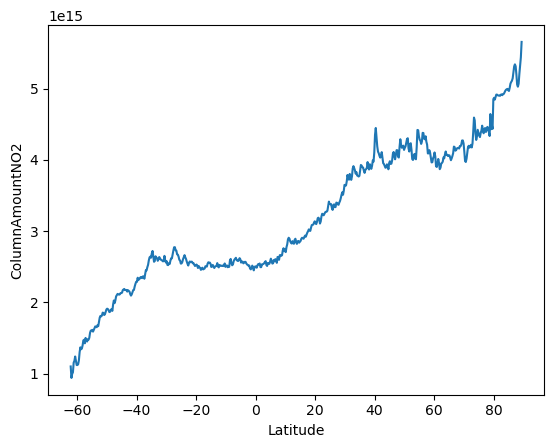

In [98]:
da_may_30.groupby('Latitude').mean(...).plot()

:::{hint}
:class: dropdown

Use the `.groupby()` method for this question. Remember there are two parts to groupby: 1) What is the coordinate variable (Time, Latitude, or Longitude) that you want to groupby? 2) What type of aggregation function (ex. `.min()`, `.max()`, `.mean()`) that you want to use to group the values?

:::

:::{note} Milestone
Another congratulations! You just completed some data analysis. Using where and groupby are not simple tasks in xarray. Nice work!

![celebrate](https://gifdb.com/images/high/applause-joe-cruz-very-nice-impression-80gucvmsuvm8w6gw.gif)
:::

### Part B Challenge Questions

_If you sped through the first questions in Part B feel free to work on these questions. They aren't necessary for the next section, however, so feel free skip them and move to part C._


**Challenge Question Part B No. 1**

- Go back to earthdata search and download two more files of the same data product from May 28th and May 29th 2024
- Add these files to Cryocloud and open them in xarray
- Plot each of the two files. You'll notice that they have the same pattern of nodata gaps, but that the nodata gaps of each image isat a slightly different location.

In [99]:
# May 29th
ds_may_29 = xr.open_dataset('OMI-Aura_L3-OMI_MINDS_NO2d_2024m0529_v01-01-2024m0617t101615.nc')
# May 28th
ds_may_28 = xr.open_dataset('OMI-Aura_L3-OMI_MINDS_NO2d_2024m0528_v01-01-2024m0618t213127.nc')

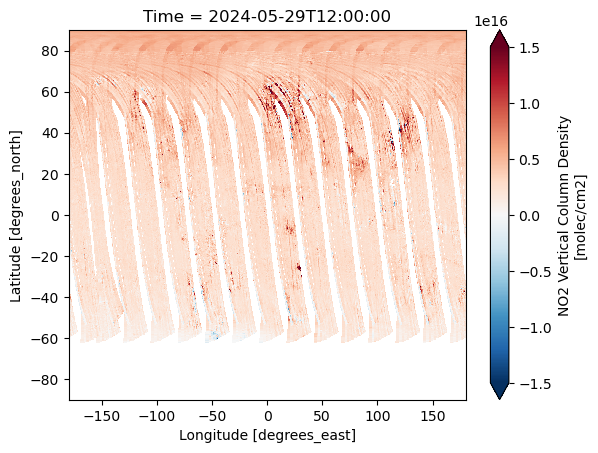

In [100]:
ds_may_29.ColumnAmountNO2.plot(vmax=1.5e16)

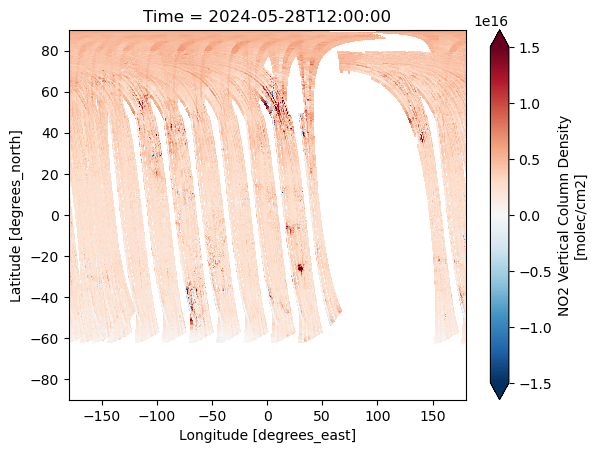

In [101]:
ds_may_28.ColumnAmountNO2.plot(vmax=1.5e16)

In [102]:
ds_may_28

<xarray.Dataset> Size: 17MB
Dimensions:                           (Latitude: 720, Longitude: 1440, Time: 1,
                                       BoundsIndex: 2)
Coordinates:
  * Latitude                          (Latitude) float32 3kB -89.88 ... 89.88
  * Longitude                         (Longitude) float32 6kB -179.9 ... 179.9
  * Time                              (Time) datetime64[ns] 8B 2024-05-28T12:...
  * BoundsIndex                       (BoundsIndex) int32 8B 1 2
Data variables:
    LatitudeBounds                    (Latitude, BoundsIndex) float32 6kB ...
    LongitudeBounds                   (Longitude, BoundsIndex) float32 12kB ...
    TimeBounds                        (Time, BoundsIndex) datetime64[ns] 16B ...
    crs                               int32 4B ...
    ColumnAmountNO2                   (Time, Latitude, Longitude) float32 4MB ...
    ColumnAmountNO2CloudScreened      (Time, Latitude, Longitude) float32 4MB ...
    ColumnAmountNO2TropCloudScreened  (Time, Latitude, Longitude) float32 4MB ...
    Weight                            (Time, Latitude, Longitude) float32 4MB ...
Attributes: (12/50)
    AuthorAffiliation:              NASA/GSFC
    AuthorName:                     L. Lamsal, N. Krotkov, S. Marchenko, et al.
    comment:                        This release of the OMI_MINDS_NO2d produc...
    Conventions:                    CF-1.8
    DataSetQuality:                 Validation of the OMI NO2 retrievals with...
    DayNightFlag:                   Day
    ...                             ...
    VersionID:                      1.1
    WesternmostLongitude:           -180.0
    history:                        2024-06-18 21:31:27: original file create...
    GranuleID:                      OMI-Aura_L3-OMI_MINDS_NO2d_2024m0528_v01-...
    LocalGranuleID:                 OMI-Aura_L3-OMI_MINDS_NO2d_2024m0528_v01-...
    ProductionDateTime:             2024-06-18T21:31:27.0Z

**Challenge Question Part B No. 2**

You currently should have three different 2D xarray Datasets, one for each image. Combine those images together into a single Dataset that has the dimensions Latitude, Longitude and Time.

In [103]:
ds_all = xr.concat([ds_may_30.ColumnAmountNO2, ds_may_29.ColumnAmountNO2, 
                    ds_may_28.ColumnAmountNO2], dim='Time')

:::{hint}
:class: dropdown

The xarray documentation has a really nice page about [combining data](https://docs.xarray.dev/en/stable/user-guide/combining.html). Check it out 👀

:::


**Challenge Question Part B No. 3**

- Average your new stacked 3D Dataset together to create a single 2D data variable
- Plot this new averaged image to create a map of $NO_2$ concentrations

In [104]:
ds_avg = ds_all.mean(dim='Time')

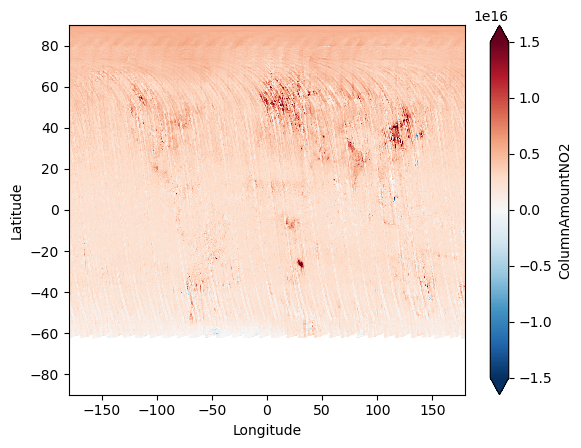

In [105]:
ds_avg.plot(vmax=1.5e16)

## Part C (Bonus Section) - Mapping

While we haven't done mapping yet in class you all know enough xarray that you can probably understand parts of the code below. Run the code below to generate a map. The next few steps will ask you to tweak the code to make it better suited for this dataset.

In [106]:
import cartopy.crs as ccrs
import matplotlib as mpl
import matplotlib.pyplot as plt

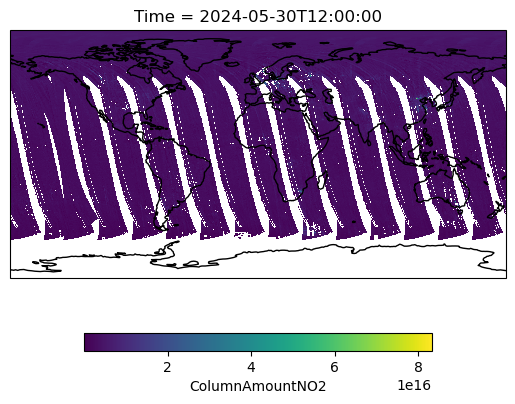

In [108]:
fig, axis = plt.subplots(1, 1, subplot_kw=dict(projection=ccrs.PlateCarree()))

da_may_30.plot(
    ax=axis,
    transform=ccrs.PlateCarree(),
    cbar_kwargs={"orientation": "horizontal", "shrink": 0.7},
)
axis.coastlines() 

**Question 12**

Notice that, while there are more arguments, this code is using the same `.plot()` method you've used throughtout this notebook. Add the `vmax` argument with a value of 1.5e16 to the plot.

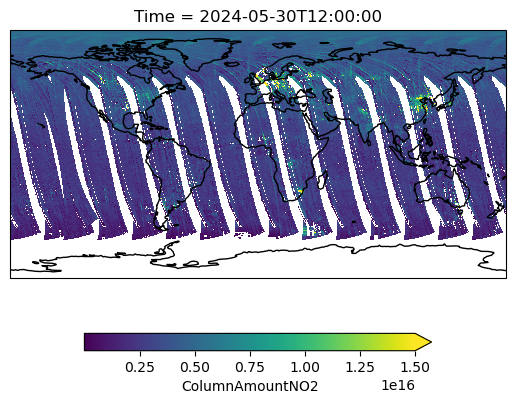

In [109]:
fig, axis = plt.subplots(1, 1, subplot_kw=dict(projection=ccrs.PlateCarree()))

da_may_30.plot(
    ax=axis,
    transform=ccrs.PlateCarree(),  # this is important!
    cbar_kwargs={"orientation": "horizontal", "shrink": 0.7},
    vmax=1.5e16,
)
axis.coastlines() 

**Question 13**

Subset this plot so that is shows just the US.

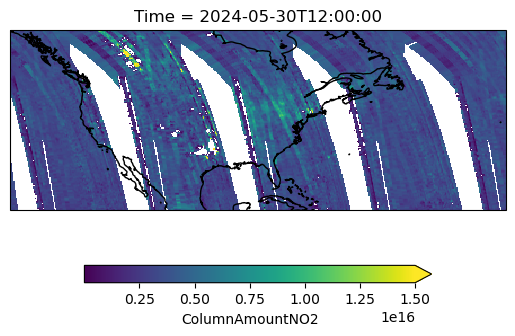

In [110]:
fig, axis = plt.subplots(1, 1, subplot_kw=dict(projection=ccrs.PlateCarree()))

da_may_30.sel(Latitude=slice(20, 60), Longitude=slice(-140, -30)).plot(
    ax=axis,
    transform=ccrs.PlateCarree(),  # this is important!
    cbar_kwargs={"orientation": "horizontal", "shrink": 0.7},
    vmax=1.5e16,
)
axis.coastlines() 